In [ ]:
# ✅ Load merged data
from google.colab import files

uploaded = files.upload()

Saving asos_merged_training.csv to asos_merged_training.csv


In [ ]:
# ✅  Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("asos_merged_training.csv")

In [ ]:
# ✅  Initial Data Inspection
print(df.shape)
print(df.columns.tolist())
df.head()

(834688, 77)
['variant_id', 'customer_id', 'isReturned', 'yearOfBirth', 'isMale', 'shippingCountry', 'premier', 'salesPerCustomer', 'returnsPerCustomer', 'customerReturnRate', 'customerId_level_return_code_A', 'customerId_level_return_code_B', 'customerId_level_return_code_C', 'customerId_level_return_code_D', 'customerId_level_return_code_E', 'customerId_level_return_code_D.1', 'customerId_level_return_code_F', 'customerId_level_return_code_G', 'customerId_level_return_code_H', 'customerId_level_return_code_I', 'customerId_level_return_code_J', 'customerId_level_return_code_K', 'customerId_level_return_code_L', 'Country_A', 'Country_B', 'Country_C', 'Country_D', 'Country_E', 'Country_F', 'Country_G', 'Country_H', 'Country_I', 'hash(productID)', 'productType', 'hash(supplierRef)', 'brandDesc', 'avgGbpPrice', 'avgDiscountValue', 'salesPerProduct', 'returnsPerProduct', 'productReturnRate', 'variantID_level_return_code_A', 'variantID_level_return_code_B', 'variantID_level_return_code_C', 

,variant_id,customer_id,isReturned,yearOfBirth,isMale,shippingCountry,premier,salesPerCustomer,returnsPerCustomer,customerReturnRate,...,productType_D,productType_E,productType_F,productType_G,productType_H,productType_I,productType_J,productType_K,age,age_group
0,1773657695342074536,2143516120,1,1981,0,Country_G,0,6,4,0.666667,...,0,0,0,0,0,0,0,0,44,36–45
1,1773657695342074536,-1662228049,1,1984,0,Country_G,0,16,12,0.750000,...,0,0,0,0,0,0,0,0,41,36–45
2,-5435047160525608540,-828983942,0,1998,0,Country_G,0,10,3,0.300000,...,0,0,0,0,0,0,0,0,27,26–35
3,1537024608144344266,993695551,0,1987,0,Country_E,0,5,4,0.800000,...,0,0,0,0,0,0,0,0,38,36–45
4,3067996428822420629,278586302,1,1981,0,Country_H,0,4,4,1.000000,...,0,0,0,0,0,0,0,0,44,36–45


Top correlated features:
isReturned                          1.000000
customerReturnRate                  0.534717
productReturnRate                   0.316291
returnsPerCustomer                  0.205395
Country_E                           0.159774
productType_B                       0.151105
avgGbpPrice                         0.132412
customerId_level_return_code_D.1    0.080122
productType_D                       0.075048
variantID_level_return_code_J       0.071145
variantID_level_return_code_D.1     0.068183
variantID_level_return_code_I       0.065309
returnsPerProduct                   0.060668
productType_J                       0.043209
Brand_B                             0.037135
Name: isReturned, dtype: float64


Text(0.5, 1.0, 'Top Numeric Correlations with Return')

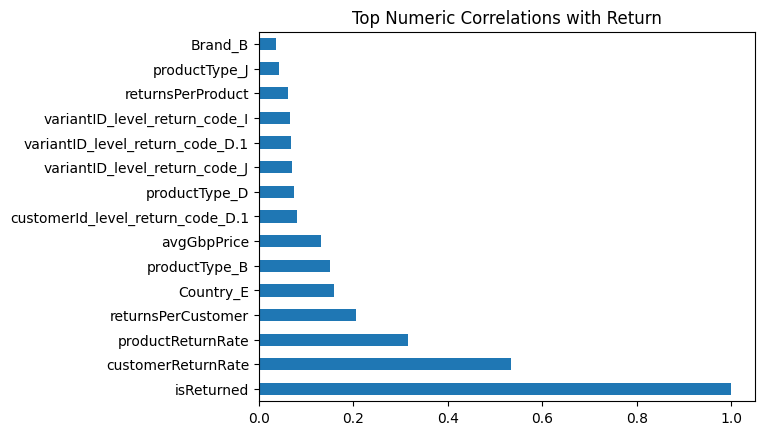

In [ ]:
# ✅  Numeric Correlation Analysis
corr = df.corr(numeric_only=True)["isReturned"].sort_values(ascending=False)
print("Top correlated features:")
print(corr.head(15))

num_corr = df.corr(numeric_only=True)['isReturned'].sort_values(ascending=False).head(15)
num_corr.plot.barh(); plt.title('Top Numeric Correlations with Return')

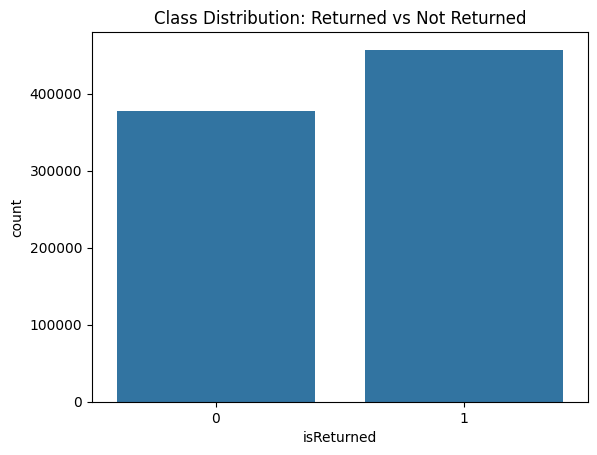

In [ ]:
# ✅ Explore target class balance
sns.countplot(data=df, x="isReturned")
plt.title("Class Distribution: Returned vs Not Returned")
plt.show()

In [ ]:
# ✅ Customer Return Frequency Distribution
returns_by_customer = df[df['isReturned'] == 1].groupby('customer_id').size()
return_freq_distribution = returns_by_customer.value_counts().sort_index()
print("How often customers return products:")
print(return_freq_distribution)

How often customers return products:
1     286469
2      53796
3      13379
4       4044
5       1461
6        590
7        200
8         92
9         47
10        27
11        14
12         6
13         4
14         2
15         3
17         1
22         1
28         1
Name: count, dtype: int64


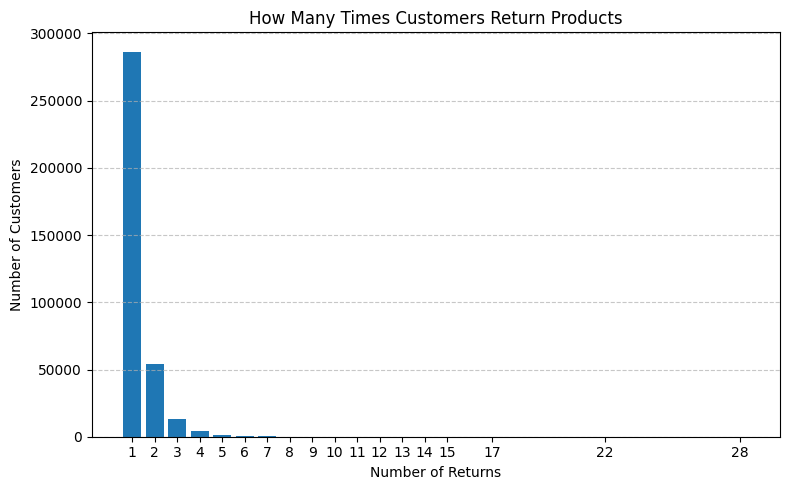

In [ ]:

plt.figure(figsize=(8, 5))
plt.bar(return_freq_distribution.index, return_freq_distribution.values)
plt.title('How Many Times Customers Return Products')
plt.xlabel('Number of Returns')
plt.ylabel('Number of Customers')
plt.xticks(return_freq_distribution.index)  # Show all x-axis values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

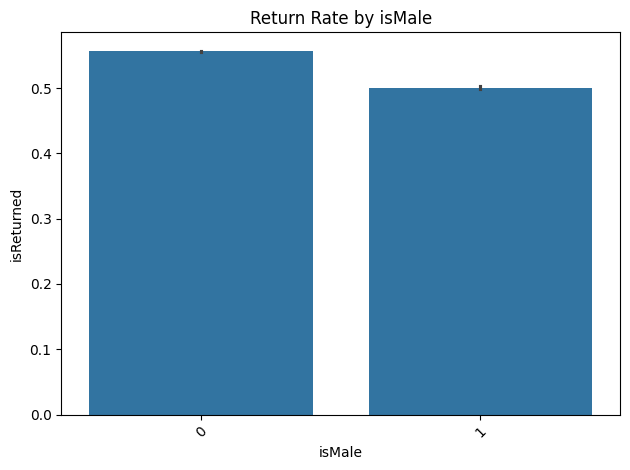

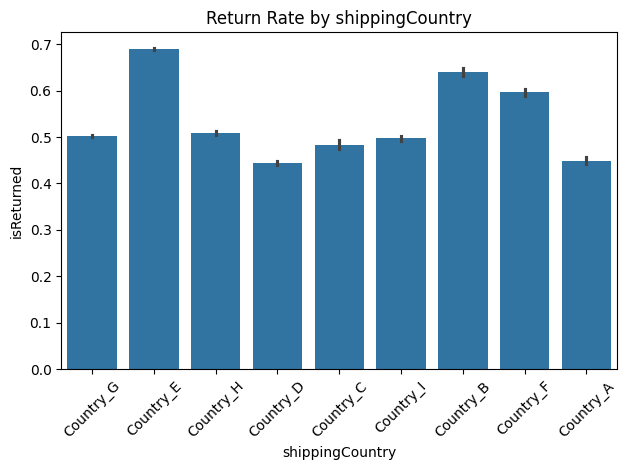

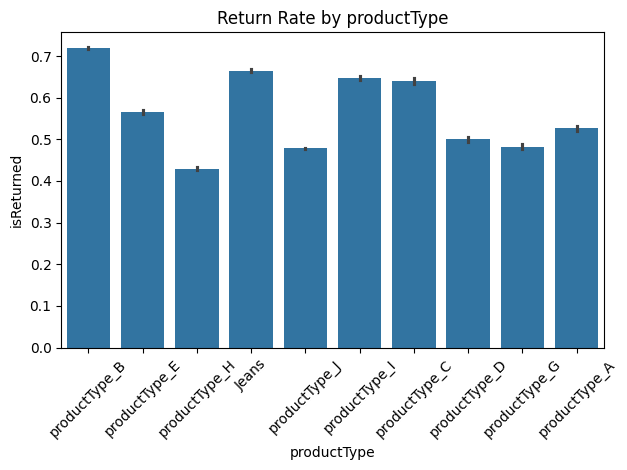

In [ ]:
# ✅ Categorical Return Rates
for c in ['isMale','shippingCountry','productType']:
    vals = df[c].value_counts().nlargest(10).index
    sns.barplot(x=c, y='isReturned', data=df[df[c].isin(vals)])
    plt.title(f'Return Rate by {c}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Return Rate by Age Group')

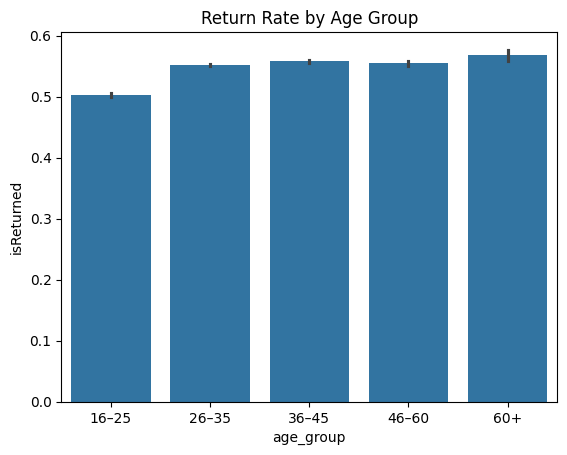

In [ ]:
# ✅ Age Group Analysis
import datetime
df['age'] = datetime.datetime.now().year - df['yearOfBirth']
df['age_group'] = pd.cut(df['age'], [15,25,35,45,60,100], labels=['16–25','26–35','36–45','46–60','60+'])
sns.barplot(x='age_group', y='isReturned', data=df)
plt.title('Return Rate by Age Group')

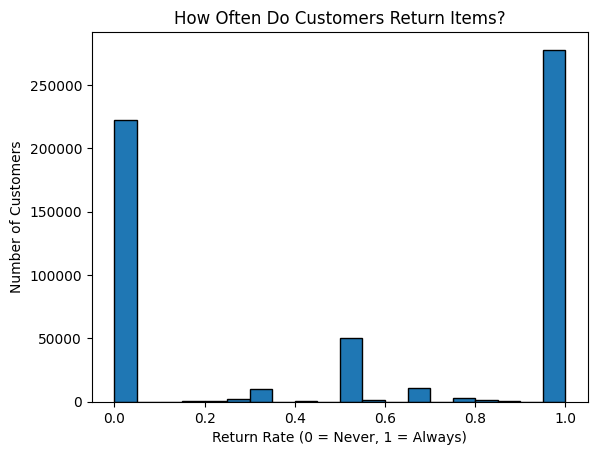

In [ ]:
# 📊 Return frequency per customer
return_freq = df.groupby('customer_id')['isReturned'].mean()
plt.hist(return_freq, bins=20, edgecolor='black')
plt.title("How Often Do Customers Return Items?")
plt.xlabel("Return Rate (0 = Never, 1 = Always)")
plt.ylabel("Number of Customers")
plt.show()